In [1]:
from library.Layers import D1FullLayer
from library.Activations import SigmoidActivation
from library.Losses import MeanSquaredError
from library.Network import Network
import numpy as np

import matplotlib.pyplot as plt

In [2]:
x = np.array([
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-3,-3,-3],
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-3,-3,-3],
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-3,-3,-3]
])
y = np.array([
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0]
])

In [3]:
net = Network(3)
net.add(D1FullLayer, output_size=2, activation_type=SigmoidActivation)
net.add(D1FullLayer, output_size=1, activation_type=SigmoidActivation)

In [4]:
oldmse = MeanSquaredError.value(y, pred := net.predict_many(x))
newmse = oldmse - 1

print("MSE", oldmse)
print(pred, end="\n\n")

mse_history = [oldmse]

count = 0
while count < 100000 and (oldmse-newmse) > 0.000000001:
    count += 1
    oldmse = MeanSquaredError.value(y, net.predict_many(x))
    net.fit(x, y, MeanSquaredError, lr=100)
    newmse = MeanSquaredError.value(y, pred := net.predict_many(x))
    mse_history.append(newmse)

print('MSE', newmse)
print(pred)

MSE 0.17322211342217086
[[0.75940562]
 [0.76227424]
 [0.54775467]
 [0.52768749]
 [0.75940562]
 [0.76227424]
 [0.54775467]
 [0.52768749]
 [0.75940562]
 [0.76227424]
 [0.54775467]
 [0.52768749]]

MSE 0.16381016407399676
[[0.76807782]
 [0.7680816 ]
 [0.52330905]
 [0.52327264]
 [0.76807782]
 [0.7680816 ]
 [0.52330905]
 [0.52327264]
 [0.76807782]
 [0.7680816 ]
 [0.52330905]
 [0.52327264]]


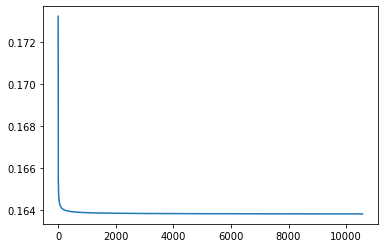

In [5]:
plt.plot(mse_history)